<a href="https://colab.research.google.com/github/Duncata/Capstone_1_DS_Fundamentals/blob/master/Capstone_1_DS_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Leading Causes of Death in United States 
### Metadata Updated: February 28, 2019

This dataset presents the age-adjusted death rates for the 10 leading causes of death in the United States beginning in 1999. Data are based on information from all resident death certificates filed in the 50 states and the District of Columbia using demographic and medical characteristics. Age-adjusted death rates (per 100,000 population) are based on the 2000 U.S. standard population. Populations used for computing death rates after 2010 are postcensal estimates based on the 2010 census, estimated as of July 1, 2010. Rates for census years are based on populations enumerated in the corresponding censuses. Rates for non-census years before 2010 are revised using updated intercensal population estimates and may differ from rates previously published. This data is recorded by the CDC(Center for Disease and Control Prevention), NCHS(National Center for Health Statistic) and National Vital Statistics System

The 19 specific age groups (younger than 1 year, 1–4 years, 5–9 years, 10–14 years, 15–19 years, … 85 years and older); This provide the basis for adjusting for differences in the age distributions across groups defined by sex, race, geography, or other categories.

The data is from Data.gov under Healthcare. This data is recorded by the CDC(Center for Disease and Control Prevention), NCHS(National Center for Health Statistic) and National Vital Statistics System. I choose this data because I have a background in nursing and engineering. This data is about the ten leading cause of death from year 1999 to 2016. It has 6 column and about 10,000 rows. The columns are the Year, 113 Cause Name, Cause Name, State, Deaths, Age Adjusted Death Rate.

(See http://www.cdc.gov/nchs/deaths.htm. , 
https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm. ,
https://www.cdc.gov/nchs/data/nvsr/nvsr66/nvsr66_06.pdf.)





---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



### QUESTION:

1. What disease cause the highest death from year 1999 to 2016?
2. What year recorded the highest death in all States?
3. What State has the highest Death?
4. Find the number of deaths per disease in all US State?

* **Import Packages**

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats

%matplotlib inline






*   **Upload Data**



In [0]:
from google.colab import files



In [113]:
uploaded = files.upload()

Saving NCHS_-_Leading_Causes_of_Death__United_States.csv to NCHS_-_Leading_Causes_of_Death__United_States (5).csv


## Exploring the Dataset

* **Read csv data into dataframe **

In [114]:
df_LCDUS= pd.read_csv('NCHS_-_Leading_Causes_of_Death__United_States.csv')
df_LCDUS.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0




*   **Check how many index and columns**




In [115]:
df_LCDUS.shape

(10296, 6)

*   **Check for null or empty rows/columns**

In [116]:
df_LCDUS.isna().sum()

Year                       0
113 Cause Name             0
Cause Name                 0
State                      0
Deaths                     0
Age-adjusted Death Rate    0
dtype: int64

*   ** Remove a single column (axis=1 refers to columns) because it is the same with cause_name which is more specific in describing the ten leading cause of death**

In [0]:
df_LCDUS.drop('113 Cause Name', axis=1, inplace=True)

*   **replace all spaces with underscores and all lower letter in the column names by using the 'str.replace' method,
this will help in the string commands (example: df_LCDUS.age_adjusted_death_rate.describe())**

In [118]:
df_LCDUS.columns = df_LCDUS.columns.str.replace(' ', '_').str.replace('-', '_').str.lower()
df_LCDUS.columns

Index(['year', 'cause_name', 'state', 'deaths', 'age_adjusted_death_rate'], dtype='object')

*   **Add new columns population by computing it from number of death 
and Age-adjusted death rates (per 100,000 population) are based on the 
2000 U.S. standard population.**

In [119]:
df_LCDUS['population'] = (df_LCDUS['deaths']*100000) / df_LCDUS['age_adjusted_death_rate']
df_LCDUS.head()

,year,cause_name,state,deaths,age_adjusted_death_rate,population
0,2016,Unintentional injuries,Alabama,2755,55.5,4.963964e+06
1,2016,Unintentional injuries,Alaska,439,63.1,6.957211e+05
2,2016,Unintentional injuries,Arizona,4010,54.2,7.398524e+06
3,2016,Unintentional injuries,Arkansas,1604,51.8,3.096525e+06
4,2016,Unintentional injuries,California,13213,32.0,4.129062e+07


*   **check type  of the value per column of  DafaFrame df_LCDUS**

In [120]:
df_LCDUS.dtypes

year                         int64
cause_name                  object
state                       object
deaths                       int64
age_adjusted_death_rate    float64
population                 float64
dtype: object

*  ** We do a quick look on its mean, std and quartile range.**

In [121]:
df_LCDUS.describe()

,year,deaths,age_adjusted_death_rate,population
count,10296.000000,1.029600e+04,10296.000000,1.029600e+04
mean,2007.500000,1.532668e+04,128.026428,1.222490e+07
std,5.188379,1.112160e+05,224.355281,4.355751e+07
min,1999.000000,2.100000e+01,2.600000,2.016807e+05
25%,2003.000000,6.060000e+02,19.200000,1.739552e+06
50%,2007.500000,1.704500e+03,35.800000,4.347318e+06
75%,2012.000000,5.678000e+03,153.025000,7.559580e+06
max,2016.000000,2.712630e+06,1087.300000,3.838498e+08


### Histogram Visualization

*   **The histogram shows the distribution of variables, the histogram belows are not Normal Distribution ** 
*   **In the Deaths variables, 0 to 250000 has the highest frequency than the rest of the variable** 
*   **In the Age Adjusted Death Rate variables 0 to 100 has the highest frequency than the rest of the  variables  ** 
*   **In the Population variables 0 to 40 million has the highest frequency than the rest of the variable.  ** 
*  **** 



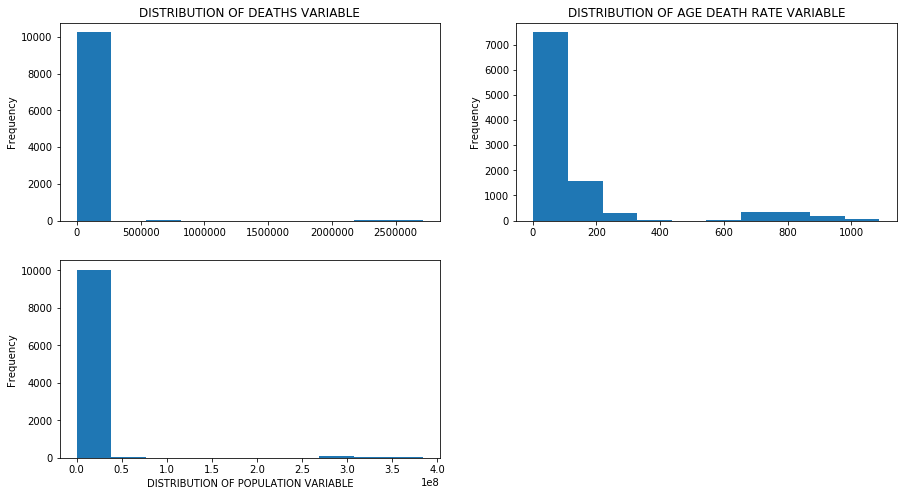

In [122]:
plt.figure(figsize=(15,8 ))

plt.subplot(2,2,1)
plt.hist(df_LCDUS.deaths)
plt.ylabel('Frequency')
plt.title('DISTRIBUTION OF DEATHS VARIABLE')

plt.subplot(2,2,2)
plt.hist(df_LCDUS.age_adjusted_death_rate)
plt.ylabel('Frequency')
plt.title('DISTRIBUTION OF AGE DEATH RATE VARIABLE')

plt.subplot(2,2,3)           
plt.hist(df_LCDUS.population)
plt.ylabel('Frequency')
plt.xlabel('DISTRIBUTION OF POPULATION VARIABLE')


plt.show()

### BOXPLOT 

* **Boxplots are used to compare groups and to identify differences in variance, as well as outliers.
There are positive outliers on the three boxplot. The median are 1700, 4 million and 36 respectively.**










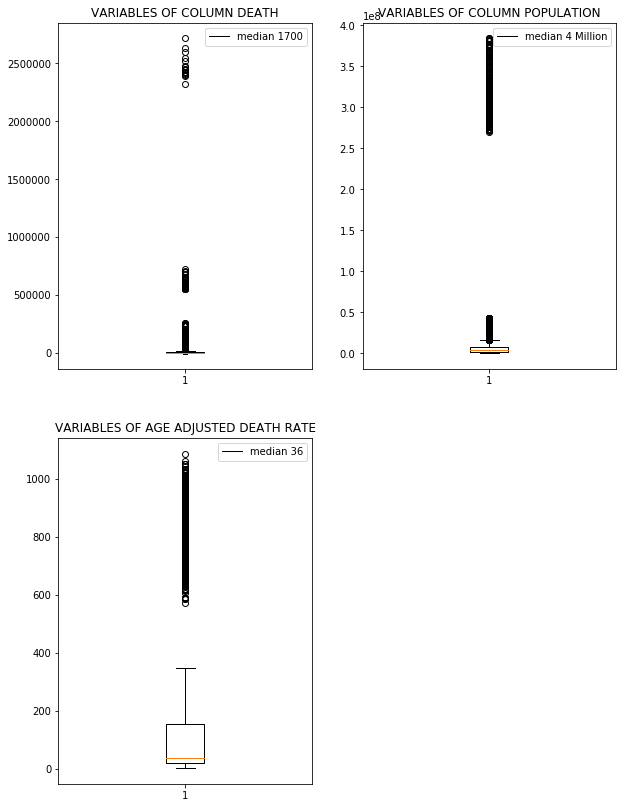

In [123]:
plt.figure(figsize=(10, 14))

plt.subplot(2,2,1)
plt.boxplot(df_LCDUS.deaths)
plt.legend(['median 1700'])
plt.title('VARIABLES OF COLUMN DEATH')


plt.subplot(2,2,2)
plt.boxplot(df_LCDUS.population)
plt.legend(['median 4 Million'])
plt.title('VARIABLES OF COLUMN POPULATION')

plt.subplot(2,2,3)
plt.boxplot(df_LCDUS.age_adjusted_death_rate)
plt.legend(['median 36'])
plt.title('VARIABLES OF AGE ADJUSTED DEATH RATE')

plt.show()



##What disease cause the highest death?


* ** Let see 1st what are the diseases, CLRD means Chronic Lower Respiratory disease, 11 diseases** 

In [124]:
df_LCDUS.cause_name.unique()

array(['Unintentional injuries', 'All causes', "Alzheimer's disease",
       'Cancer', 'CLRD', 'Diabetes', 'Heart disease',
       'Influenza and pneumonia', 'Kidney disease', 'Stroke', 'Suicide'],
      dtype=object)

* ** We  group by column cause name and describe the statistical death value **

In [125]:
df_LCDUS.groupby('cause_name').deaths.describe()

,count,mean,std,min,25%,50%,75%,max
cause_name,,,,,,,,
All causes,936.0,95518.545940,336716.532389,2708.0,13357.25,37156.5,59651.25,2712630.0
Alzheimer's disease,936.0,2934.641026,10729.820073,24.0,396.00,1106.0,2001.75,116103.0
CLRD,936.0,5202.405983,18472.212360,126.0,780.25,1974.0,3247.25,155041.0
Cancer,936.0,21890.034188,77526.682414,633.0,3019.00,8182.5,13769.00,598038.0
Diabetes,936.0,2812.775641,9972.042093,67.0,376.75,1111.0,1734.50,80058.0
Heart disease,936.0,24733.297009,87845.935873,563.0,3007.25,9097.5,15354.00,725192.0
Influenza and pneumonia,936.0,2220.019231,7907.102507,36.0,321.50,776.0,1480.00,65681.0
Kidney disease,936.0,1726.452991,6134.124786,21.0,220.00,600.5,1364.00,50476.0
Stroke,936.0,5513.119658,19623.494170,157.0,754.25,2147.0,3602.00,167661.0


* **For now, we study only the death cause by disease so we remove row All causes, Suicide, Unintentional injuries.  All causes value is way to high and have effect on our data and in our visualization. **

* **Python will retain the boolean 'True' when reading the column cause_name by row, and  we save it to a new DataFrame df_diseases.**

In [0]:
df_diseases = df_LCDUS[(df_LCDUS.cause_name != 'All causes') & 
                        (df_LCDUS.cause_name !='Unintentional injuries') & 
                        (df_LCDUS.cause_name !='Suicide')]



* **We can see now that row is reduce from 10296 to 7488.**

In [127]:
df_diseases.shape

(7488, 6)

* **We goupby number of death in the dataframe df_disease in each cause_name save it to a variable grpby_coznm_death and get the death on each disease. The no. 1 cause of is the Heart Disease and the least cause of death the Kidney disease **





In [128]:
grpby_coznm_death = df_diseases.groupby('cause_name').deaths
grpby_coznm_death.mean().sort_values(ascending=False)


cause_name
Heart disease              24733.297009
Cancer                     21890.034188
Stroke                      5513.119658
CLRD                        5202.405983
Alzheimer's disease         2934.641026
Diabetes                    2812.775641
Influenza and pneumonia     2220.019231
Kidney disease              1726.452991
Name: deaths, dtype: float64

* **Visualize it see more clearly,  in the pie visualization shows that Heart Disease cause the highest death in US from year 1999 to 2016.**

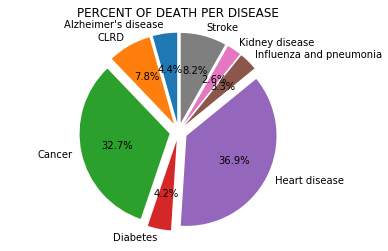

In [129]:
x = grpby_coznm_death.sum()

labels = x.index
sizes = x.values
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1 , 0.1)  # "explode" all slice


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('PERCENT OF DEATH PER DISEASE')

plt.show()

## What year recorded the highest death?


* **We group the DataFrame df_disease by year and describe the average death value statistically **

In [130]:
grpby_yr_death = df_diseases.groupby('year').deaths
grpby_yr_death.describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1999,416.0,8551.764423,46312.045389,24.0,563.00,1452.0,4104.75,725192.0
2000,416.0,8533.384615,45854.574757,30.0,580.00,1536.0,4127.25,710760.0
2001,416.0,8496.149038,45456.947762,24.0,591.00,1543.5,4014.50,700142.0
2002,416.0,8559.980769,45470.667535,21.0,602.50,1618.5,3989.00,696947.0
2003,416.0,8516.125000,45000.419776,28.0,596.25,1665.5,4045.75,685089.0
2004,416.0,8267.701923,43605.816846,23.0,603.00,1594.0,3950.50,652486.0
2005,416.0,8363.149038,43797.949225,38.0,641.25,1628.5,4075.50,652091.0
2006,416.0,8172.004808,42967.928430,44.0,619.75,1614.0,3921.00,631636.0
2007,416.0,8115.370192,42512.796693,40.0,621.50,1611.0,3978.25,616067.0


* **We visualize it by line plot, the lineplot belows shows that Number of death is going down from year 1999 to 2009 and 
went up from 2009 to 2016. **

Text(0.5, 1.0, 'NUMBER OF DEATHS IN EACH YEAR')

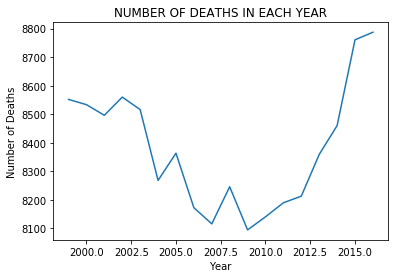

In [131]:
plt.plot(grpby_yr_death.mean())
plt.ylabel('Number of Deaths')
plt.xlabel('Year')
plt.title('NUMBER OF DEATHS IN EACH YEAR')

* **Shows in the bar visualization that the highest death recorded is in year 2016.
The lowest death recorded is 2009. **

Text(0.5, 1.0, 'AVERAGE DEATHS IN EACH YEAR')

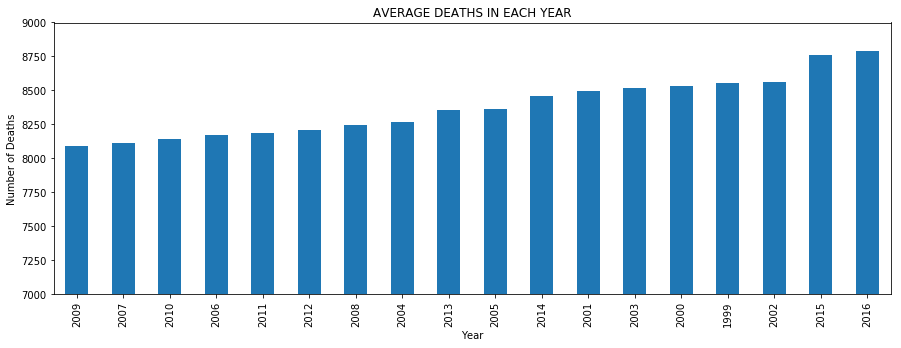

In [132]:
grpby_yr_death.mean().sort_values().plot(kind='bar', figsize=[15,5])
plt.ylabel('Number of Deaths')
plt.ylim([7000,9000])
plt.xlabel('Year')
plt.title('AVERAGE DEATHS IN EACH YEAR')

## What State has the highest Death?




*  **In the bar visualization, it shows unusual value United states which is not a state. So we have to remove it.**



Text(0, 0.5, 'Number of Deaths')

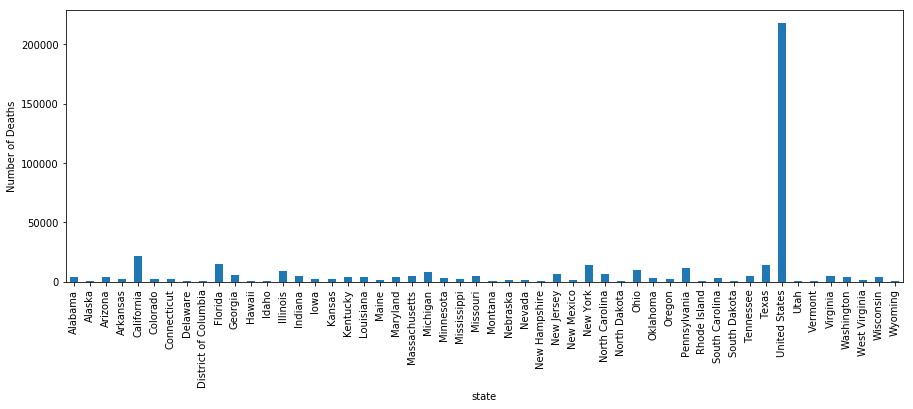

In [133]:
grp_dis_death = df_diseases.groupby('state').deaths
grp_dis_death.mean().plot(kind='bar', figsize=[15,5])
plt.ylabel('Number of Deaths')



*   **Remove the row United states and visualize it. We can see now that the highest death cause by diseases from 1999 to 2016 is California. The least death is in Alaska. We can say that alaska is Healthier State than California but we compare first the population because we are talking about the number of death. We can see that mean population from 1999-to 2015 of California is
34 million is way  above 400 thousand of Alaska ave population. So it is not reliable.**




In [134]:
#See average population from 1999 to 2016
df_diseases.groupby('state').population.mean().head()

state
Alabama       4.983487e+06
Alaska        3.984086e+05
Arizona       6.427485e+06
Arkansas      3.192074e+06
California    3.444283e+07
Name: population, dtype: float64

Text(0, 0.5, 'Number of Deaths')

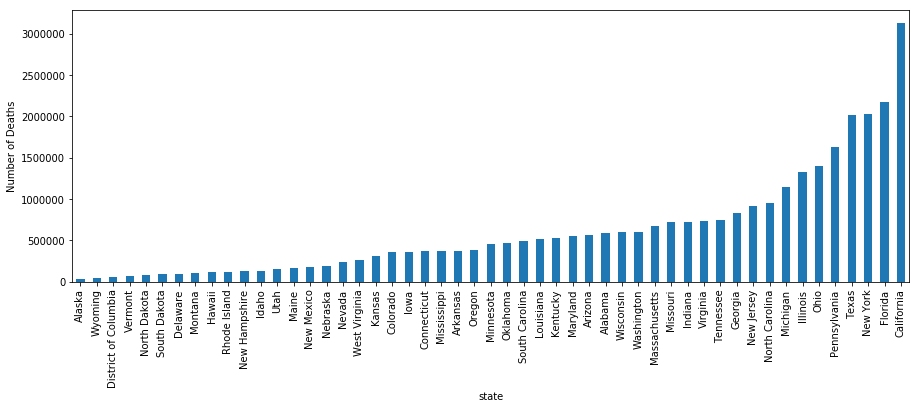

In [135]:
df_states = df_diseases[df_diseases.state != 'United States']
grp_state_death = df_states.groupby('state').deaths
grp_state_death.sum().sort_values().plot(kind='bar', figsize=[15,5])
plt.ylabel('Number of Deaths')

## Find the number of deaths per disease in all US State?


* **It will be a lot of work when looking for death per disease one by one so we make a function to find the number of death per disease in all US State.**

In [0]:
def dis_per_states(x):
    for n in df_states['cause_name'].unique():
        
        if n == x:
            df_dis= df_states[df_states['cause_name'] == x]
    
            return df_dis.groupby('state').deaths.mean().sort_values().plot(kind= 'bar', figsize=[15,5], color='green')
    

* **Heart Disease is number 1 killer in California **

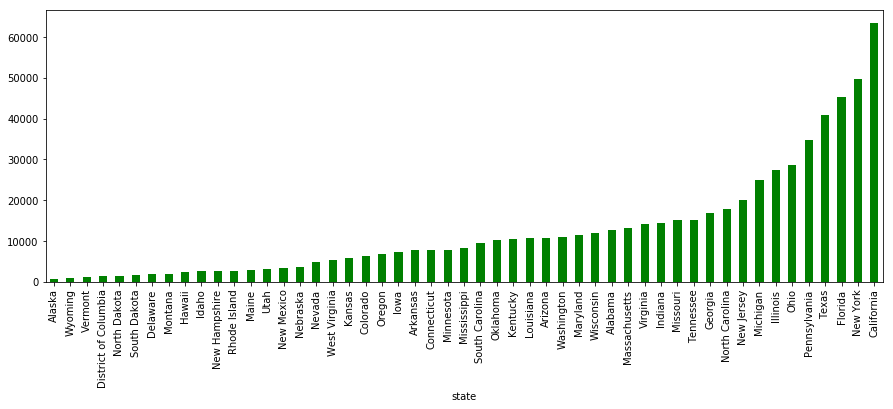

In [137]:
dis_per_states('Heart disease')

* ** **

* **Kidney Disease is number 1 killer in Texas **

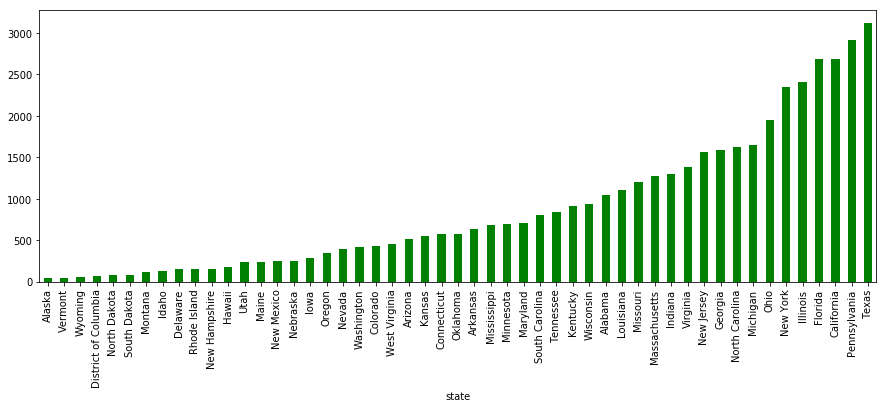

In [138]:
dis_per_states('Kidney disease')

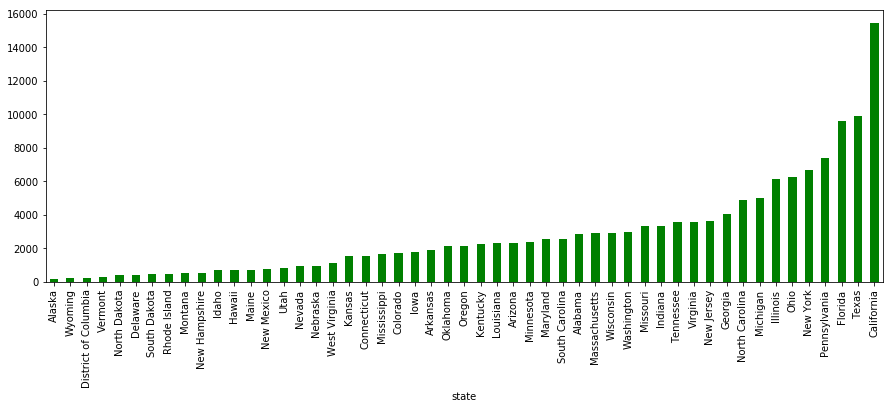

In [139]:
dis_per_states("Stroke")

**FUTURE QUESTION:**
### What are the underlying cause and reasons why in other State got the highest death per particular disease?



---

